In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import os
import pandas as pd

# Purpose of the Notebook

This notebook is designed to assess the Woreda maps and the Relative Wealth Index (RWI) for the Addis Insights Market Intelligence Platform. The primary objectives of this notebook include:

- **Assessment of Woreda Maps**: Visualizing and analyzing the geographical boundaries of Woredas to understand their spatial distribution and characteristics.

- **Analysis of Relative Wealth Index (RWI)**: Evaluating the RWI data to gain insights into the socio-economic status of different Woredas, which can inform decision-making and resource allocation.

- **Creation of a Merged GeoDataFrame**: Integrating the Woreda maps with RWI data to create a comprehensive GeoDataFrame. This merged dataset will facilitate further analysis and visualization, providing valuable insights for stakeholders involved in market intelligence and planning.

By combining geographical and socio-economic data, this notebook aims to enhance the understanding of the Woredas in Addis Ababa and support strategic initiatives within the Addis Insights platform.

## 1. Woreda base map

In [25]:
# Read the shape files
woreda_path = os.path.join('aa_worda_boundary', 'aa_worda_boundary.shp')

woreda_gdf = gpd.read_file(woreda_path)

In [4]:
print("\nWoreda Dataset Info:")
print("-------------------")
print(woreda_gdf.info())
print("\nColumns:", woreda_gdf.columns.tolist())
print("\nNumber of woredas:", len(woreda_gdf))



Woreda Dataset Info:
-------------------
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID_1       116 non-null    float64 
 1   OBJECTID    116 non-null    float64 
 2   Sub_City    116 non-null    object  
 3   Woreda      116 non-null    object  
 4   Shape_Le_1  116 non-null    float64 
 5   Shape_Area  116 non-null    float64 
 6   Region      116 non-null    object  
 7   geometry    116 non-null    geometry
dtypes: float64(4), geometry(1), object(3)
memory usage: 7.4+ KB
None

Columns: ['FID_1', 'OBJECTID', 'Sub_City', 'Woreda', 'Shape_Le_1', 'Shape_Area', 'Region', 'geometry']

Number of woredas: 116


C:\Users\yared\AppData\Local\Temp\ipykernel_12344\1767040008.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(woreda_gdf.geometry.centroid.x, woreda_gdf.geometry.centroid.y, woreda_gdf['Woreda']):


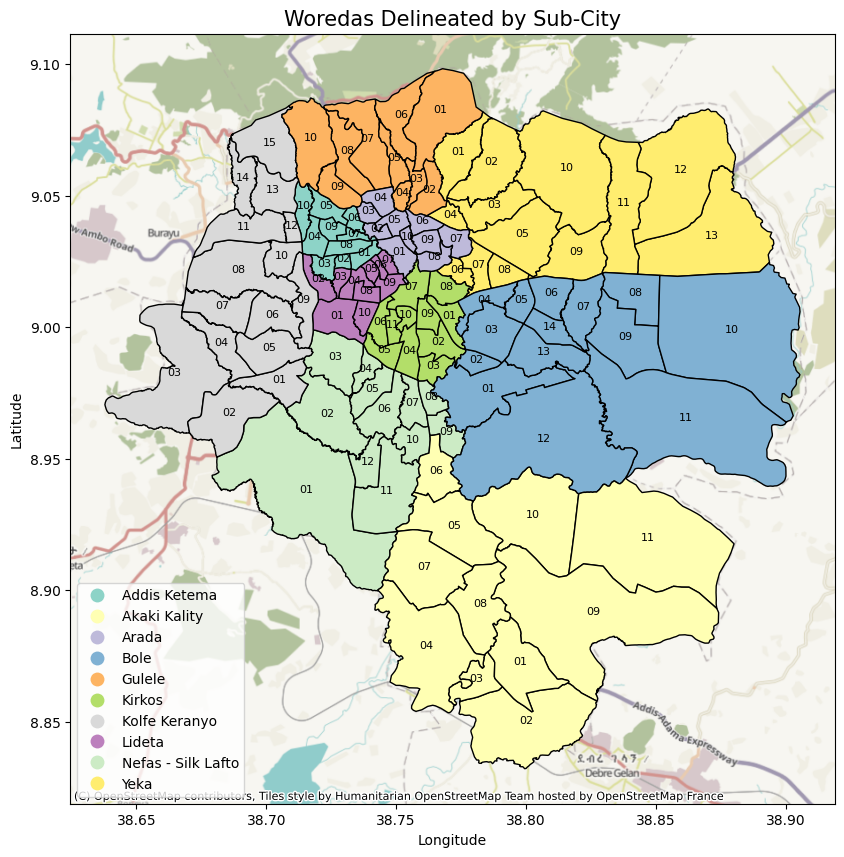

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Woredas delineated by Sub-City
woreda_gdf.plot(column='Sub_City', ax=ax, legend=True, cmap='Set3', edgecolor='black')

# Add a basemap
ctx.add_basemap(ax, crs=woreda_gdf.crs.to_string())

# Set titles and labels
ax.set_title('Woredas Delineated by Sub-City', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add Woreda names to the map
for x, y, label in zip(woreda_gdf.geometry.centroid.x, woreda_gdf.geometry.centroid.y, woreda_gdf['Woreda']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

plt.show()

## 2. Relative Wealth Index Data

In [26]:
# Load the CSV file
wealth_index_path = 'eth_relative_wealth_index.csv'
wealth_index_df = pd.read_csv(wealth_index_path)


In [27]:
# Print basic information about the wealth index dataset
print("\nWealth Index Dataset Info:")
print("---------------------------")
print(wealth_index_df.info())
print("\nColumns:", wealth_index_df.columns.tolist())
print("\nNumber of entries:", len(wealth_index_df))


Wealth Index Dataset Info:
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85142 entries, 0 to 85141
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   85142 non-null  float64
 1   longitude  85142 non-null  float64
 2   rwi        85142 non-null  float64
 3   error      85142 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB
None

Columns: ['latitude', 'longitude', 'rwi', 'error']

Number of entries: 85142


## 3. Merging the RWI with Woreda basemap

In [28]:
# Merge the wealth index DataFrame with the woreda_gdf based on spatial join
# First, convert the wealth index DataFrame to a GeoDataFrame
wealth_index_gdf = gpd.GeoDataFrame(
    wealth_index_df, 
    geometry=gpd.points_from_xy(wealth_index_df.longitude, wealth_index_df.latitude),
    crs="EPSG:4326"  # Assuming the coordinates are in WGS84
)

In [29]:
# Perform a spatial join to merge based on geometry
merged_gdf = gpd.sjoin(woreda_gdf, wealth_index_gdf, how='left', predicate='intersects')
# Print the merged GeoDataFrame
print("\nMerged GeoDataFrame with Wealth Index:")
print(merged_gdf)


Merged GeoDataFrame with Wealth Index:
     FID_1  OBJECTID      Sub_City Woreda    Shape_Le_1    Shape_Area  \
0      0.0       1.0  Addis Ketema     10   6733.076700  1.286172e+06   
1      1.0       2.0  Addis Ketema     05   6794.250398  1.292793e+06   
2      2.0       3.0  Addis Ketema     06   4169.446807  6.352946e+05   
3      3.0       4.0  Addis Ketema     07   4889.471067  5.025473e+05   
4      4.0       5.0  Addis Ketema     01   4558.169146  7.866500e+05   
..     ...       ...           ...    ...           ...           ...   
112  114.0     115.0  Akaki Kality     01  13052.807437  6.165409e+06   
113  115.0     116.0  Akaki Kality     08  13185.368207  6.112732e+06   
114  112.0     113.0  Akaki Kality     07  12608.728084  8.001610e+06   
115  113.0     114.0  Akaki Kality     04  23266.758904  1.359048e+07   
115  113.0     114.0  Akaki Kality     04  23266.758904  1.359048e+07   

          Region                                           geometry  \
0    ADDIS A

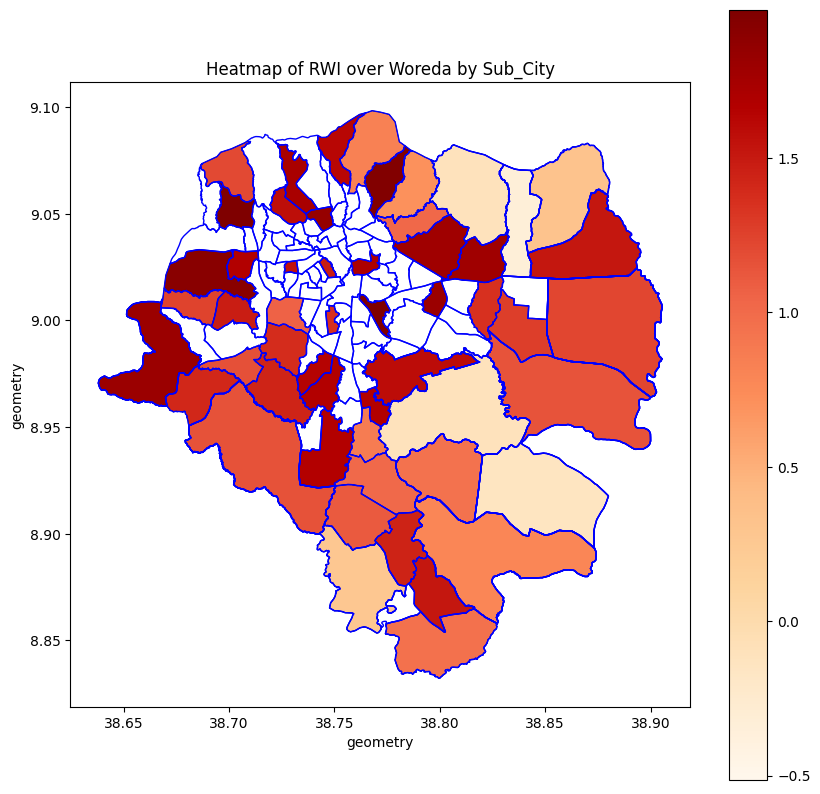

In [30]:
# Assuming merged_gdf contains the RWI and Sub_City information
# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the Woreda with heatmap based on RWI
merged_gdf.plot(column='rwi', ax=ax, legend=True,
                 cmap='OrRd',  # Choose a color map
                 edgecolor='black',  # Border color for Woreda
                 linewidth=0.5)

# Overlay Sub_City borders with a different color
merged_gdf.boundary.plot(ax=ax, color='blue', linewidth=1)

# Add title and labels
plt.title('Heatmap of RWI over Woreda by Sub_City')
plt.xlabel('geometry')
plt.ylabel('geometry')

# Show the plot
plt.show()

In [31]:
merged_gdf.isna().sum()

FID_1           0
OBJECTID        0
Sub_City        0
Woreda          0
Shape_Le_1      0
Shape_Area      0
Region          0
geometry        0
index_right    63
latitude       63
longitude      63
rwi            63
error          63
dtype: int64

### Missing value imputation
The map displays blank areas for empty woredas in terms of RWI. The analysis reveals that out of the 116 woredas, 63 records are missing. To address this, a solution is proposed to impute missing values by calculating the mean RWI at the sub-city level.


In [ ]:
# Step 1: Calculate the mean RWI for each Sub_City
mean_rwi_subcity = merged_gdf.groupby('Sub_City')['rwi'].mean()

# Step 2: Fill missing RWI values at the Woreda level
# Create a function to fill missing values
def fill_missing_rwi(row):
    if pd.isna(row['rwi']):
        return mean_rwi_subcity[row['Sub_City']]
    else:
        return row['rwi']

# Apply the function to fill missing RWI values
merged_gdf['rwi'] = merged_gdf.apply(fill_missing_rwi, axis=1)

# Optionally, check if there are any missing values left
missing_values = merged_gdf['rwi'].isna().sum()
print(f"Missing RWI values after filling: {missing_values}")

Missing RWI values after filling: 0


Recheck the map 

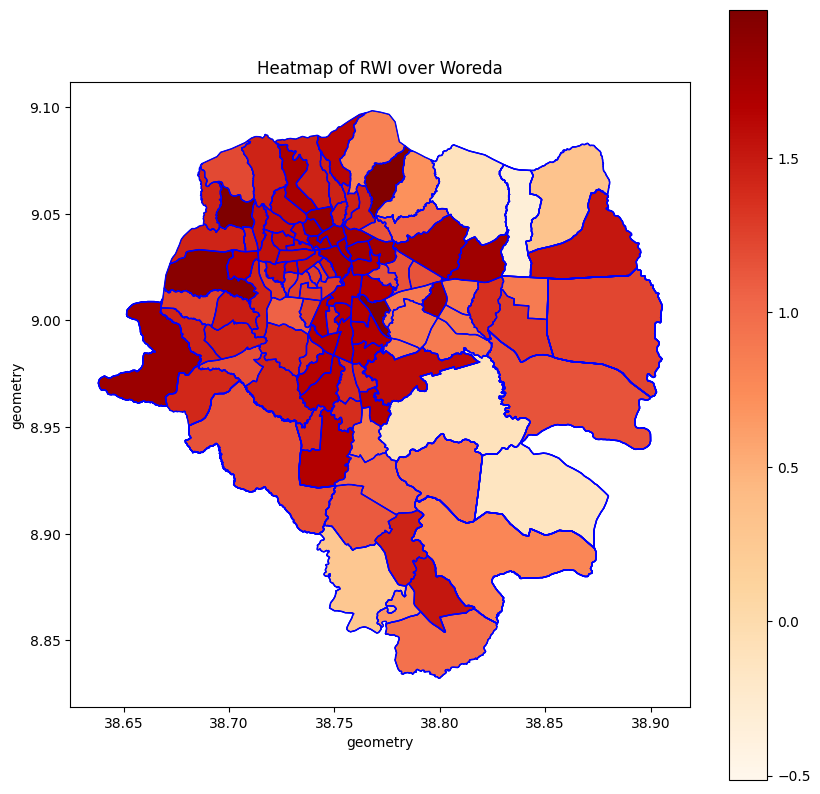

In [33]:
# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the Woreda with heatmap based on RWI
merged_gdf.plot(column='rwi', ax=ax, legend=True,
                 cmap='OrRd',  # Choose a color map
                 edgecolor='black',  # Border color for Woreda
                 linewidth=0.5)

# Overlay Sub_City borders with a different color
merged_gdf.boundary.plot(ax=ax, color='blue', linewidth=1)

# Add title and labels
plt.title('Heatmap of RWI over Woreda')
plt.xlabel('geometry')
plt.ylabel('geometry')

# Show the plot
plt.show()

Save the file in geojson

In [34]:
merged_gdf.to_file("rwi_data.geojson", driver="GeoJSON")